# Multilevel Modeling with Python
#### 5 December 2025 by Betty Yang

### This is a step-by-step demonstration on how to conduct a multilevel regression analysis using Python

## Step 1: Understanding a Multilevel Regression Model
- [Multilevel Modeling: A Comprehensive Guide for Data Scientists](https://www.datacamp.com/tutorial/multilevel-modeling)
- [Advanced Statistics: Multilevel Regression](https://advstats.psychstat.org/python/multilevel/index.php)
- [Centering options and interpretations](https://www.learn-mlms.com/08-module-8.html)
- [A Fun Intro to Multilevel Models in R](https://favstats.github.io/intro_multilevel/slides/#1)

## Step 2: Data Extraction and Manipulation
This analysis will use five datasets that have been extracted and cleaned

- **df01** [Health Outcomes by Zip Code](https://datacommons.org/place/geoId/3651000?category=Health): df01_health_by_Zip.csv

- **df02** [Averaged Heat Vulnerability (HVI) by Zip Code](https://a816-dohbesp.nyc.gov/IndicatorPublic/data-features/hvi/): df02_HVI_Averages.csv

- **df03** [Risk Factors by Zip Code](https://simplemaps.com/city/new-york/zips/age-median): df03_Data_by_Zip.csv

- **df04** [City and Borough Data from NYU Furman Center](https://furmancenter.org/stateofthecity/view/citywide-and-borough-data): df04_Data_by_Borough.csv

- **df05** [UHF Neighborhood Codes by United Hospital Fund](https://www.nyc.gov/assets/doh/downloads/pdf/ah/zipcodetable.pdf): df05_UHF42_Zip.csv


###  **2.1**  Import *pandas* library for working with dataframes

In [600]:
import pandas as pd

### **2.2** Read five csv files and save them as *padas* dataframes

- **health** df has 183 rows (zip codes) and 4 columns (Zip, PoorPhysicalHealthPercent, PoorMentalHealthPercent, HighBPPercent)<br>

- **HVI_Average** df has 419 rows (zip codes) and 3 columns (Zip, Borough, avgHVI)<br> 

- **riskZ** has 184 rows (zip codes) and 10 columns (Zip, MedianAge, MedianIncome, PercentCollege, PercentMake. PercentMarried, PercentWhite, PercentBlack, PercentAsian, PercentOtherRace)<br>

- **riskB** has 5 rows (boroughs) and 9 columns (Borough, 65+Percent, ForeignBornPercent, RacialDiversityIndex, MedianHouseholdIncome, PovertyRate, UnemployRate, BAdegreePercent, HomeownershipPercent)<br>

- **UHF42** has 176 rows (zip codes) and 3 columns (Borough, UHF42, Zip). UHF42 is a column of unique codes for the 42 neighborhoods defined by United Hospital Fund.

In [601]:
health = pd.read_csv('df01_Health_by_Zip.csv') # Health outcomes by zip code
HVI = pd.read_csv('df02_HVI_Averages.csv')  # Averaged HVI by zip code
riskZ = pd.read_csv('df03_Data_by_Zip.csv') # Risk factors by zip code
riskB = pd.read_csv('df04_Data_by_Borough.csv') # Risk factors by borough
UHF42 = pd.read_csv('df05_UHF42_Zip.csv') # Risk factors by borough

### **2.3** Merge five dataframes in four steps

In [602]:
# First, merge UHF42 with health 
merged_df1 = pd.merge(UHF42, health, on='Zip', how='inner')
dropUnnamed_df1 = merged_df1.drop('Unnamed: 0', axis=1)

# Second, merged df1 with selected columns of HVI by zip code (HVI)
selected_HVI = HVI[['Zip', 'avgHVI']]
merged_df2 = pd.merge(dropUnnamed_df1, selected_HVI, on='Zip', how='inner')

# Then, merged df2 with risk factors by zip code (riskZ)
merged_df3 = pd.merge(merged_df2, riskZ, on='Zip', how='inner')

# Finally, merged df2 with risk factors by zip code (riskB)
merged_df4 = pd.merge(merged_df3, riskB, on='Borough', how='inner')

merged_df4

,Borough,UHF42,Zip,PoorPhysicalHealthPercent,PoorMentalHealthPercent,HighBPPercent,avgHVI,MedianAge,MedianIncome,PercentCollege,...,PercentAsian,PercentOtherRace,Percent65plus,ForeignBornPercent,RacialDiversityIndex,MedianHouseholdIncome,PovertyRate,UnemployRate,BAdegreePercent,HomeownershipPercent
0,BX,101,10463,14.2,15.4,30.9,3.375,41.9,72952.0,43.9,...,4.0,42.5,10.1,29.3,0.65,43390.0,30.7,14.3,14.6,19.5
1,BX,101,10471,10.8,13.2,28.9,3.000,46.4,108738.0,58.5,...,4.6,29.3,10.1,29.3,0.65,43390.0,30.7,14.3,14.6,19.5
2,BX,102,10466,15.0,18.0,36.7,5.000,37.2,66328.0,25.9,...,2.0,28.0,10.1,29.3,0.65,43390.0,30.7,14.3,14.6,19.5
3,BX,102,10469,13.9,16.5,35.5,4.500,39.9,76018.0,29.1,...,6.3,24.2,10.1,29.3,0.65,43390.0,30.7,14.3,14.6,19.5
4,BX,102,10470,12.5,16.3,30.8,5.000,41.5,81134.0,40.8,...,2.6,21.6,10.1,29.3,0.65,43390.0,30.7,14.3,14.6,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,SI,504,10306,11.9,15.4,32.5,1.400,41.9,97746.0,33.6,...,15.7,12.0,11.6,16.4,0.47,86500.0,10.0,5.9,23.2,63.8
169,SI,504,10307,9.8,14.8,29.8,1.000,41.2,138807.0,39.5,...,4.7,9.8,11.6,16.4,0.47,86500.0,10.0,5.9,23.2,63.8
170,SI,504,10308,11.2,15.3,30.9,1.000,43.2,122654.0,40.3,...,7.5,8.7,11.6,16.4,0.47,86500.0,10.0,5.9,23.2,63.8
171,SI,504,10309,11.0,15.6,30.6,1.000,42.2,123638.0,39.9,...,4.0,7.7,11.6,16.4,0.47,86500.0,10.0,5.9,23.2,63.8


### **2.4** Investigating on outliers

In [604]:
# Check the fully merged data frame (merged_df4) and check MedianAge
merged_df4.sort_values(by='MedianAge')

,Borough,UHF42,Zip,PoorPhysicalHealthPercent,PoorMentalHealthPercent,HighBPPercent,avgHVI,MedianAge,MedianIncome,PercentCollege,...,PercentAsian,PercentOtherRace,Percent65plus,ForeignBornPercent,RacialDiversityIndex,MedianHouseholdIncome,PovertyRate,UnemployRate,BAdegreePercent,HomeownershipPercent
43,BK,206,11219,16.3,19.2,28.7,3.200000,25.5,55685.0,21.5,...,21.2,15.9,11.5,37.8,0.72,50500.0,25.1,10.7,21.8,27.1
28,BK,202,11205,11.9,18.1,23.8,2.750000,30.5,86753.0,52.5,...,6.7,17.5,11.5,37.8,0.72,50500.0,25.1,10.7,21.8,27.1
59,BK,211,11206,14.9,19.6,25.8,3.500000,30.7,57280.0,36.3,...,6.6,30.7,11.5,37.8,0.72,50500.0,25.1,10.7,21.8,27.1
6,BX,103,10458,17.9,20.8,30.3,4.000000,31.1,42107.0,16.1,...,3.8,66.6,10.1,29.3,0.65,43390.0,30.7,14.3,14.6,19.5
25,BK,201,11211,11.3,17.7,20.2,3.000000,31.4,105183.0,54.8,...,7.0,24.1,11.5,37.8,0.72,50500.0,25.1,10.7,21.8,27.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,QN,410,11697,11.2,13.4,33.1,3.000000,49.8,134844.0,52.0,...,0.7,1.1,12.6,45.9,0.76,66690.0,14.6,7.7,24.3,42.8
122,QN,404,11362,9.9,10.9,31.1,1.000000,50.5,118989.0,52.2,...,48.5,7.9,12.6,45.9,0.76,66690.0,14.6,7.7,24.3,42.8
120,QN,403,11360,11.0,11.2,32.9,1.666667,53.0,100250.0,49.1,...,29.8,11.9,12.6,45.9,0.76,66690.0,14.6,7.7,24.3,42.8
11,BX,104,10464,11.5,12.8,30.6,3.500000,54.9,100306.0,45.8,...,2.1,29.8,10.1,29.3,0.65,43390.0,30.7,14.3,14.6,19.5


### **2.5** Deleting outliers 
One should delete outliers ***only if*** there's a good reason to do so.<br> 

In our study, zip code **11005** is an outlier, because the Median Age in 11005 is odd (80.6 years old). Upon investigatin, 11005 consist of one nursing home only. Delete this outlier from the dataframe to prevent this outlier from being a leverage point.

In [605]:
# Deleting the row of 11005 by querying out zip codes that are NOT 11005
merged_df4 = merged_df4.query('Zip != 11005')
merged_df4.sort_values(by='MedianAge')

,Borough,UHF42,Zip,PoorPhysicalHealthPercent,PoorMentalHealthPercent,HighBPPercent,avgHVI,MedianAge,MedianIncome,PercentCollege,...,PercentAsian,PercentOtherRace,Percent65plus,ForeignBornPercent,RacialDiversityIndex,MedianHouseholdIncome,PovertyRate,UnemployRate,BAdegreePercent,HomeownershipPercent
43,BK,206,11219,16.3,19.2,28.7,3.200000,25.5,55685.0,21.5,...,21.2,15.9,11.5,37.8,0.72,50500.0,25.1,10.7,21.8,27.1
28,BK,202,11205,11.9,18.1,23.8,2.750000,30.5,86753.0,52.5,...,6.7,17.5,11.5,37.8,0.72,50500.0,25.1,10.7,21.8,27.1
59,BK,211,11206,14.9,19.6,25.8,3.500000,30.7,57280.0,36.3,...,6.6,30.7,11.5,37.8,0.72,50500.0,25.1,10.7,21.8,27.1
6,BX,103,10458,17.9,20.8,30.3,4.000000,31.1,42107.0,16.1,...,3.8,66.6,10.1,29.3,0.65,43390.0,30.7,14.3,14.6,19.5
25,BK,201,11211,11.3,17.7,20.2,3.000000,31.4,105183.0,54.8,...,7.0,24.1,11.5,37.8,0.72,50500.0,25.1,10.7,21.8,27.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,QN,404,11363,10.3,11.6,30.3,1.000000,49.6,110833.0,54.9,...,28.9,13.8,12.6,45.9,0.76,66690.0,14.6,7.7,24.3,42.8
160,QN,410,11697,11.2,13.4,33.1,3.000000,49.8,134844.0,52.0,...,0.7,1.1,12.6,45.9,0.76,66690.0,14.6,7.7,24.3,42.8
122,QN,404,11362,9.9,10.9,31.1,1.000000,50.5,118989.0,52.2,...,48.5,7.9,12.6,45.9,0.76,66690.0,14.6,7.7,24.3,42.8
120,QN,403,11360,11.0,11.2,32.9,1.666667,53.0,100250.0,49.1,...,29.8,11.9,12.6,45.9,0.76,66690.0,14.6,7.7,24.3,42.8


### **2.6** Deleting incomplete rows
Multilevel analysis requires complete rows, therefore incomplete rows need to be deleted.

In [606]:
df_dropNa = merged_df4.dropna()
df_dropNa.sort_values(by='Zip')

,Borough,UHF42,Zip,PoorPhysicalHealthPercent,PoorMentalHealthPercent,HighBPPercent,avgHVI,MedianAge,MedianIncome,PercentCollege,...,PercentAsian,PercentOtherRace,Percent65plus,ForeignBornPercent,RacialDiversityIndex,MedianHouseholdIncome,PovertyRate,UnemployRate,BAdegreePercent,HomeownershipPercent
81,MN,306,10001,8.8,14.5,19.4,1.000000,35.0,123393.0,71.5,...,18.0,16.7,12.2,29.4,0.68,73910.0,19.9,8.4,49.4,20.2
93,MN,309,10002,15.0,15.8,31.2,2.333333,42.9,46525.0,38.9,...,36.7,22.7,12.2,29.4,0.68,73910.0,19.9,8.4,49.4,20.2
94,MN,309,10003,8.0,15.5,17.9,1.250000,31.7,153750.0,82.2,...,17.9,10.5,12.2,29.4,0.68,73910.0,19.9,8.4,49.4,20.2
96,MN,310,10004,6.5,12.7,16.9,1.000000,32.9,220592.0,90.9,...,23.8,5.5,12.2,29.4,0.68,73910.0,19.9,8.4,49.4,20.2
97,MN,310,10005,5.7,14.3,11.5,1.000000,31.5,211810.0,84.3,...,14.2,13.7,12.2,29.4,0.68,73910.0,19.9,8.4,49.4,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,QN,410,11691,15.2,18.6,35.6,4.500000,36.0,57027.0,23.3,...,4.1,25.5,12.6,45.9,0.76,66690.0,14.6,7.7,24.3,42.8
157,QN,410,11692,15.6,19.1,36.2,5.000000,36.8,49507.0,26.5,...,5.6,22.5,12.6,45.9,0.76,66690.0,14.6,7.7,24.3,42.8
158,QN,410,11693,14.1,17.0,33.2,4.000000,44.9,67829.0,35.7,...,4.6,18.7,12.6,45.9,0.76,66690.0,14.6,7.7,24.3,42.8
159,QN,410,11694,12.8,15.1,33.2,4.000000,44.1,103792.0,43.2,...,1.8,12.8,12.6,45.9,0.76,66690.0,14.6,7.7,24.3,42.8


### **2.7** Save the preprocessed dataframe for future uses 
For investigating other combinations of health outcomes and predictors

In [607]:
df_dropNa.to_csv('MLM_dataframe.csv', index=False)

### **2.8** Select the columns for a smaller dataframe for analysis
Health Outcome (Y): PoorPhysicalHealthPercent <br>
Level 1 Predictor (X1): avgHVI, Zip <br>
Level 2 Predictor (X2): Percent65plus, UHF42, Borough <br>

In [608]:
df = df_dropNa[['PoorPhysicalHealthPercent', 'avgHVI', 'Percent65plus', 'Zip','UHF42', 'Borough']].copy()

### **2.9** Cluster-Mean Centering
First, calculate the cluster mean ('mHVI') for each UHF42 neighborhood for 'avgHVI' <br> 
Then, subtract the cluster mean 'mHVI' from each 'avgHVI' to get a cluster-centered value 'HVI_CMC' <br> 

In [609]:
df['mHVI'] = df.groupby('UHF42')['avgHVI'].transform('mean')
df['HVI_CMC'] = df['avgHVI'] - df['mHVI'] 

## Step 3: Data Visualization

### **3.1** Import the necessary libraries for data visualization

In [610]:
import numpy as np                    # data generation
import matplotlib.pyplot as plt       # for creating scatter plots
from matplotlib.ticker import MaxNLocator
import seaborn as sns                 # for generating and overlaying regression graphs
import statsmodels.formula.api as smf # for regression models (mixed linear model)

### **3.2** Create outcome and predictor variables from the analysis dataframe

In [611]:
PoorPhysical = df['PoorPhysicalHealthPercent'].copy()
avgHVI = df['avgHVI'].copy()
Percent65plus = df['Percent65plus'].copy()

### **3.3** Create a scatter plot for each predictor against the outcome variable using one color and a corresponding regression line going through the data points

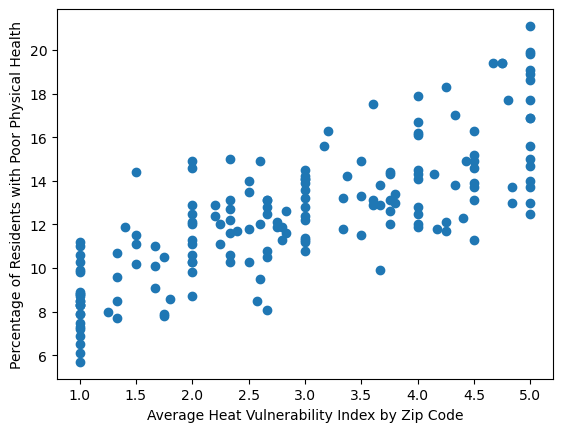

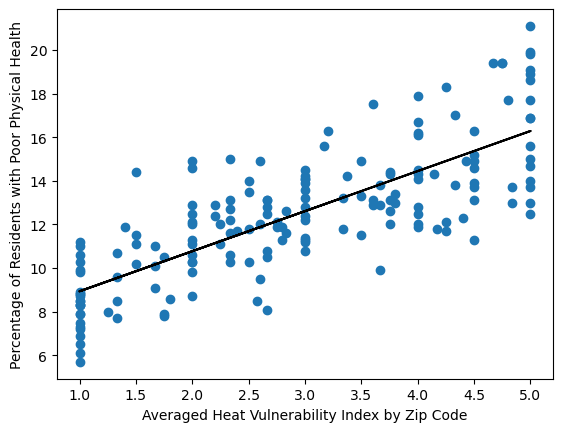

In [612]:
# (3.3a) Scatter plot for predictor variable "avgHVI"
plt.scatter(avgHVI, PoorPhysical) # (x, y)
plt.xlabel("Average Heat Vulnerability Index by Zip Code")
plt.ylabel("Percentage of Residents with Poor Physical Health")
plt.show()

# (3.3b) Scatter plot and regression line for "avgHVI"
m, b = np.polyfit(avgHVI, PoorPhysical, 1)
plt.plot(avgHVI, m*avgHVI + b, color='black', label='Regression Line')
plt.scatter(avgHVI, PoorPhysical) # (x, y)
plt.xlabel("Averaged Heat Vulnerability Index by Zip Code")
plt.ylabel("Percentage of Residents with Poor Physical Health")
plt.show()


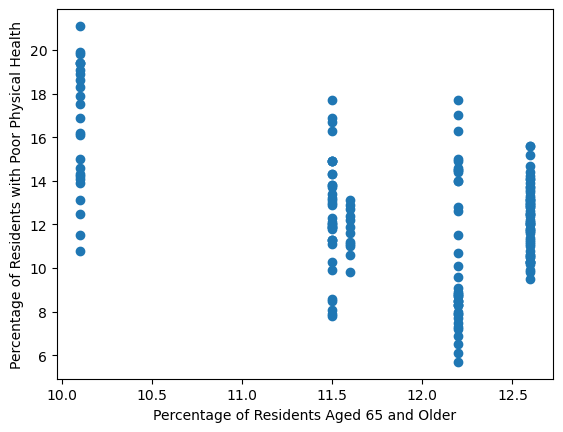

In [613]:
# (3.3c) For predictor variable "Percent65plus"
#m, b = np.polyfit(poverty, PoorPhysical, 1) # (x, y, 1)
#plt.plot(Poverty, m*poverty + b, color='black', label='Regression Line')
plt.scatter(Percent65plus, PoorPhysical) # (x, y)
plt.xlabel("Percentage of Residents Aged 65 and Older")
plt.ylabel("Percentage of Residents with Poor Physical Health")
plt.show()

### **3.4** Assign a different color to each borough to create scatter plots

In [614]:
# (3.4a) Define colors for each group(borough)
borough_colors = {
    'BK': 'green',
    'BX': 'red',
    'MN': 'blue',
    'QN': 'orange',
    'SI': 'purple'
}

# Create a list of colors corresponding to each data point's group
colors = [borough_colors[borough] for borough in df['Borough']]

Text(0.5, 1.0, 'Relationship between Poor Physical Health and Heat Vunerability Index')

<Figure size 800x600 with 0 Axes>

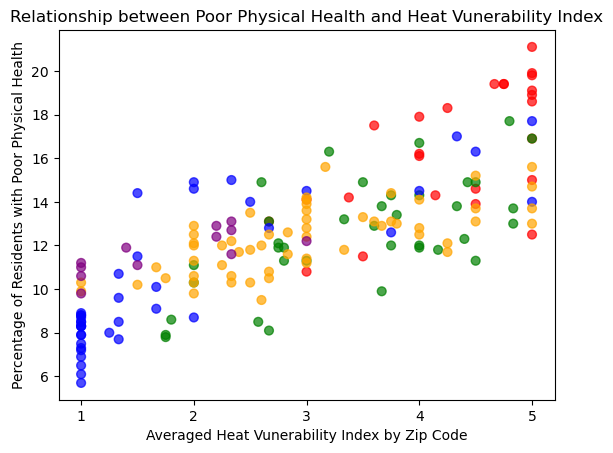

In [615]:
# (3.4b) Create a color-coded scatter plot for avgHVI
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots() # Defining ax is required for setting x-axis to be integers later
plt.scatter(df['avgHVI'], df['PoorPhysicalHealthPercent'], c=colors, s=40, alpha=0.7) # For size, alpha for transparency
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Set the major x-axis locator to only show integers
plt.xlabel('Averaged Heat Vunerability Index by Zip Code')
plt.ylabel('Percentage of Residents with Poor Physical Health')
plt.title('Relationship between Poor Physical Health and Heat Vunerability Index')

Text(0.5, 1.0, 'Relationship between Poor Physical Health and Older Population')

<Figure size 800x600 with 0 Axes>

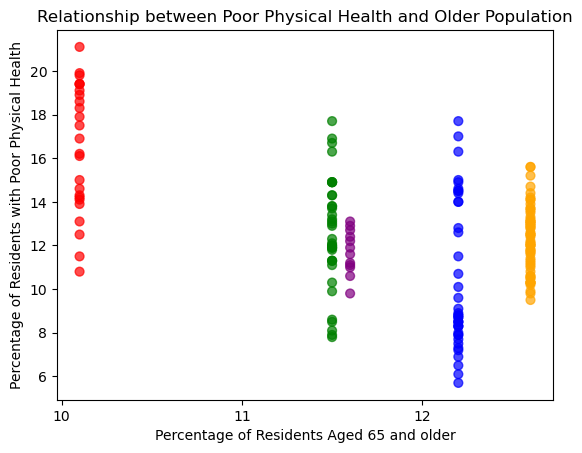

In [616]:
# (3.4c) Create a color-coded scatter plot for Percent65plus
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots() # Defining ax is required for setting x-axis to be integers later
plt.scatter(df['Percent65plus'], df['PoorPhysicalHealthPercent'], c=colors, s=40, alpha=0.7) # s for size, alpha for transparency
ax.xaxis.set_major_locator(MaxNLocator(integer=True))# Set the major x-axis locator to only show integers
plt.xlabel('Percentage of Residents Aged 65 and older')
plt.ylabel('Percentage of Residents with Poor Physical Health')
plt.title('Relationship between Poor Physical Health and Older Population')

In [617]:
# (3.5) Overlay five scatterplots for avgHVI_CMC, each with its own regression line
# (3.5a) First, create five dataframes, each for a borough
df_BX = df[df['Borough'] == 'BX'] # Bronx
df_MN = df[df['Borough'] == 'MN'] # Manhattan
df_BK = df[df['Borough'] == 'BK'] # Brooklyn
df_QN = df[df['Borough'] == 'QN'] # Queens
df_SI = df[df['Borough'] == 'SI'] # Staten Island

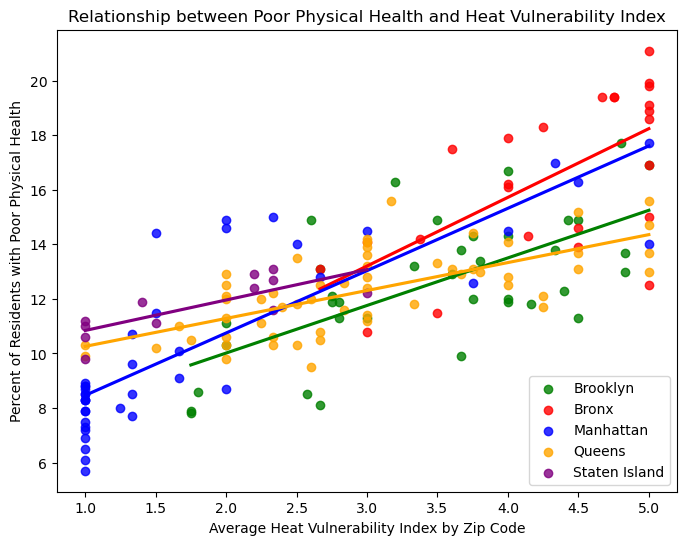

In [618]:
# (3.5b) Create a figure and a single axis object
fig, ax = plt.subplots(figsize=(8, 6))

# (3.3c) Plot a regressions lines through each of the five borough clusters for avgHVI
sns.regplot(x='avgHVI', y='PoorPhysicalHealthPercent', data=df_BK, ci=None, ax=ax, color='green', label='Brooklyn')
sns.regplot(x='avgHVI', y='PoorPhysicalHealthPercent', data=df_BX, ci=None, ax=ax, color='red', label='Bronx')
sns.regplot(x='avgHVI', y='PoorPhysicalHealthPercent', data=df_MN, ci=None, ax=ax, color='blue', label='Manhattan')
sns.regplot(x='avgHVI', y='PoorPhysicalHealthPercent', data=df_QN, ci=None, ax=ax, color='orange', label='Queens')
sns.regplot(x='avgHVI', y='PoorPhysicalHealthPercent', data=df_SI, ci=None, ax=ax, color='purple', label='Staten Island')

# (3.3d) Create labels for x-axis, y-axis, and a legend on the lower right corner
ax.set_xlabel('Average Heat Vulnerability Index by Zip Code')
ax.set_ylabel('Percent of Residents with Poor Physical Health')
ax.set_title('Relationship between Poor Physical Health and Heat Vulnerability Index')
ax.legend(loc='lower right')
plt.show()

## Step 4: Data Analysis
Resource: [Multilevel Regression](https://advstats.psychstat.org/python/multilevel/index.php)

### **4.1** Import the necessary libraries for regression models (mixed linear model)

In [619]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

### **4.2** The Null Model for multilevel regression

In [620]:
#(4.2a) Specify the null model
null_model = smf.mixedlm("PoorPhysicalHealthPercent ~ 1", data=df, groups=df["UHF42"])

#(4.2b) Fit the null model
results_null = null_model.fit()

#(4.2c) Display the results from fitting the null model
print(results_null.summary())

                 Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PoorPhysicalHealthPercent
No. Observations: 172     Method:             REML                     
No. Groups:       42      Scale:              2.2614                   
Min. group size:  1       Log-Likelihood:     -369.5040                
Max. group size:  8       Converged:          Yes                      
Mean group size:  4.1                                                  
--------------------------------------------------------------------------
                 Coef.     Std.Err.      z       P>|z|    [0.025    0.975]
--------------------------------------------------------------------------
Intercept        12.629       0.453    27.891    0.000    11.741    13.516
Group Var         7.958       1.453                                       



### **4.3** Calculate Intraclass Correlation Coefficient (ICC)
**ICC** = ratio of the variance explained by the multilevel structure and the variance of the outcome variable. <br> 
** ICC  = Between-Group Variance / Total Variance <br>
        = Group Var Coef. / (Group Var Coef. + Scale) <br>

In social science, it often ranges from 0.05 to 0.25. <br> 

When ICC is large, it means the between-group variance cannot be ignored and thus a multilevel model is preferred. <br>

If ICC > 0.1, one should consider the use of a multilevel model. <br>

As the ICC is **0.78** (> 0.1) for this study, multilevel modeling is preferred.

In [621]:
ICC_null = 7.958 /(7.958 + 2.2614)
print(ICC_null)

0.7787149930524296


### **4.4** The Fixed-Effects Model

In [622]:
#(4.4a) Specify a fixed-effects model as
#       PoorHealth = beta0 + beta1*mHVI + beta2*Age65plus + Vij + Eij

model_fixedE = smf.mixedlm("PoorPhysicalHealthPercent ~ mHVI + Percent65plus", data=df, groups=df["UHF42"])

#(4.4b) Fit the fixed effects model
results_fixedE = model_fixedE.fit()

#(4.4c) Display the results
print(results_fixedE.summary())


                 Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PoorPhysicalHealthPercent
No. Observations: 172     Method:             REML                     
No. Groups:       42      Scale:              2.2586                   
Min. group size:  1       Log-Likelihood:     -343.6257                
Max. group size:  8       Converged:          Yes                      
Mean group size:  4.1                                                  
--------------------------------------------------------------------------
                 Coef.     Std.Err.      z       P>|z|    [0.025    0.975]
--------------------------------------------------------------------------
Intercept        16.231       4.282     3.791    0.000     7.839    24.623
mHVI              1.689       0.224     7.550    0.000     1.250     2.127
Percent65plus    -0.732       0.333    -2.198    0.028    -1.385    -0.079
Group Var         1.816       0.417                            

**Results**: Based on the output of the analysis, both **mHVI** and **Percent65plus** are significant given the p-values in the results table.

### **4.5** Two-Level Model with two predictors

In [624]:
# Drop the 'Borough' dataset because .means() cannot be used on Borough 
# which contains strings (BX, BK, MN, QN, SI).
df = df.drop('Borough', axis=1)

#(4.5a) Specify a two-level model with two predictors
model_2level = smf.mixedlm("PoorPhysicalHealthPercent ~ mHVI + Percent65plus + HVI_CMC + mHVI*HVI_CMC + Percent65plus*HVI_CMC", data=df, groups=df["UHF42"], re_formula="~1 + HVI_CMC")

#(4.5b) Fit the two-level model
results_2level = model_2level.fit()

#(4.5c) Display the results
print(results_2level.summary())

                 Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PoorPhysicalHealthPercent
No. Observations: 172     Method:             REML                     
No. Groups:       42      Scale:              1.2767                   
Min. group size:  1       Log-Likelihood:     -314.8814                
Max. group size:  8       Converged:          Yes                      
Mean group size:  4.1                                                  
------------------------------------------------------------------------
                         Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------------------
Intercept                16.237     4.295   3.781  0.000   7.819  24.654
mHVI                      1.693     0.224   7.567  0.000   1.254   2.131
Percent65plus            -0.733     0.334  -2.193  0.028  -1.389  -0.078
HVI_CMC                   6.309     5.887   1.072  0.284  -5.229  17.847
mH

## Step 5: Interpretations of Results
The parameters in the table of Fixed Effects give the estimates for gammas:<br>

**Beta0j** = 16.237 + 1.6939*mHVIj* - 0.733*Percent65plus* + *v0j* <br>
**Beta1j** =  6.309 - 0.502*mHVIj* -0.261*Percent65plus* + *v1j* <br> 

*HVI* and *Percent65plus* are **significant predictors** both in slope and intercept. <br>

### **5.1** Plotting the Two-Level Model

                 Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PoorPhysicalHealthPercent
No. Observations: 172     Method:             REML                     
No. Groups:       42      Scale:              1.2767                   
Min. group size:  1       Log-Likelihood:     -314.8814                
Max. group size:  8       Converged:          Yes                      
Mean group size:  4.1                                                  
------------------------------------------------------------------------
                         Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------------------
Intercept                16.237     4.295   3.781  0.000   7.819  24.654
mHVI                      1.693     0.224   7.567  0.000   1.254   2.131
Percent65plus            -0.733     0.334  -2.193  0.028  -1.389  -0.078
HVI_CMC                   6.309     5.887   1.072  0.284  -5.229  17.847
mH

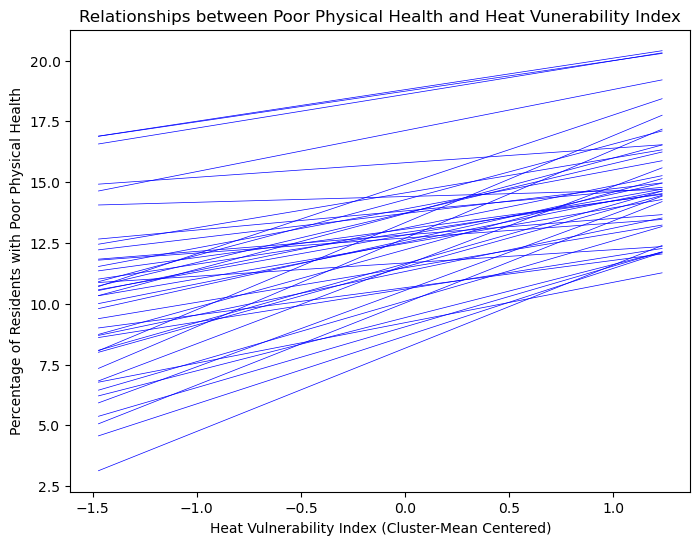

In [625]:
#(5.1a) Specify the two-level model with two predictors
model_2level = smf.mixedlm("PoorPhysicalHealthPercent ~ mHVI + Percent65plus + HVI_CMC + mHVI*HVI_CMC + Percent65plus*HVI_CMC", data=df, groups=df["UHF42"], re_formula="~1 + HVI_CMC")

#(5.1b) Fit the two-level model
results_2level = model_2level.fit()

#(5.1c) Display the results
print(results_2level.summary())

#(5.1d) Extract random effects
random_effects = results_2level.random_effects
random_effects_df = pd.DataFrame.from_dict(random_effects, orient='index')

#(5.1e) Get means for mHVI and Percent65plus
group_means = df.groupby('UHF42').mean()

#(5.1f) Calculate the intercept and slope for each borough
beta0 = 21.018 + 1.285*group_means['mHVI'] - 1.03*group_means['Percent65plus'] + random_effects_df['Group']
beta1 = 10.182 - 0.44*group_means['mHVI'] - 0.60*group_means['Percent65plus'] + random_effects_df['HVI_CMC']


#(5.1g) Plot the regressions lines
x = np.linspace(np.min(df['HVI_CMC']), np.max(df['HVI_CMC']))

# Create the plot
_ = plt.figure(figsize=(8,6))

# Plot the lines
for i in range(42):
    y = beta0.iloc[i] + beta1.iloc[i]*x
    _=plt.plot(x, y, color='blue', linewidth=0.5)

# Add labels and title
plt.xlabel('Heat Vulnerability Index (Cluster-Mean Centered)')
plt.ylabel('Percentage of Residents with Poor Physical Health')
plt.title('Relationships between Poor Physical Health and Heat Vunerability Index')

# Show the plot
plt.savefig('multilevel_regression_lines.svg', format='svg')
            
plt.show()
